<a href="https://colab.research.google.com/github/abhinavreddy910/Domain-Adaptation/blob/main/Source_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
#import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from itertools import cycle

In [ ]:
torch.cuda.is_available()

True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
transform = transforms.Compose([transforms.Resize(224),transforms.ToTensor(),transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))])

In [ ]:
trainset = datasets.ImageFolder('/content/gdrive/MyDrive/Colab Notebooks/DA/Datasets/Office /webcam/images', transform=transform) # 795 Images

validset,trainset = torch.utils.data.random_split(trainset, [150,645])

validloader = torch.utils.data.DataLoader(validset, batch_size=32,shuffle=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,shuffle=True)

testset = datasets.ImageFolder('/content/gdrive/MyDrive/Colab Notebooks/DA/Datasets/Office /dslr/images', transform=transform)  # 498 Images
testloader = torch.utils.data.DataLoader(testset, batch_size=32,shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


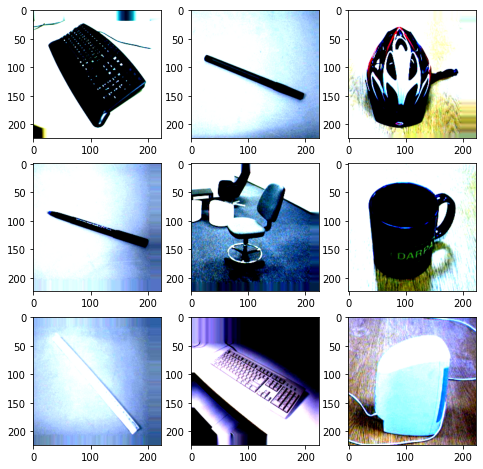

In [ ]:
trainiter = iter(trainloader)
train_images, labels = trainiter.next()
plt.figure(figsize=(8,8))
for i in range(1,10):
  image = train_images[i].numpy();
  image = np.transpose(image, (1, 2, 0))
  plt.subplot(3,3,i)
  plt.imshow(image)
 
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


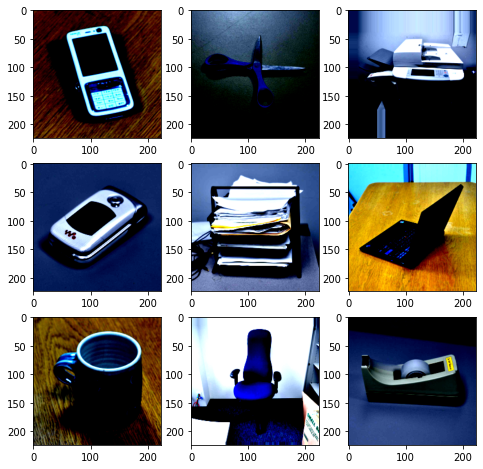

In [ ]:
testiter = iter(testloader)
test_images, labels = testiter.next()

plt.figure(figsize=(8,8))
for i in range(1,10):
  image = test_images[i].numpy();
  image = np.transpose(image, (1, 2, 0))
  plt.subplot(3,3,i)
  plt.imshow(image)
 
plt.show()

In [ ]:
alexnet_model = torch.hub.load('pytorch/vision:v0.9.0', 'alexnet', pretrained=True)
alexnet_model

Downloading: "https://github.com/pytorch/vision/archive/v0.9.0.zip" to /root/.cache/torch/hub/v0.9.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
alexnet_model.classifier[6] = nn.Identity()

In [ ]:
alexnet_model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
class GradReverse(torch.autograd.Function):

    @staticmethod
    def forward(self, x):
        return x

    @staticmethod
    def backward(self, grad_output):
        return (-1 * grad_output)   

def grad_reverse(x):
    return GradReverse()(x)


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        self.alexnet = alexnet_model

        self.adaptation_layer = nn.Sequential(
            nn.Linear(4096 , 256),
            nn.ReLU(),
            nn.Dropout(0.2),
        )

        self.labelPredictor_layer = nn.Sequential(
            nn.Linear(256 , 31),
            nn.ReLU(),
            nn.Dropout(0.2),
        )

    def forward(self, x):
        x = self.alexnet(x)
        x = self.adaptation_layer(x)
        
        x = self.labelPredictor_layer(x)

        return x   

In [ ]:
model = Model()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam([
                {'params': model.adaptation_layer.parameters()},
                {'params': model.labelPredictor_layer.parameters()},
                {'params': model.alexnet.parameters(), 'lr': 3e-6 }
            ], lr = 3e-5)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)

train_loss = []
train_accuracy = []
val_loss = []
val_accuracy = []


for epoch in range(40):  # loop over the dataset multiple times

    train_total = 0.0
    train_correct = 0.0
    tl = 0.0

    model.train()
    for data in trainloader:   
        # get the inputs; data is a list of [image, label]
        images, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()

        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        tl += loss.item()

        optimizer.step()


    # print statistics
    train_accuracy.append(100 * train_correct / train_total)
    train_loss.append(tl / train_total) 


    val_total = 0.0
    val_correct = 0.0 
    vl = 0.0  

    model.eval()
    with torch.no_grad():
         for data in validloader:   
                images, labels = data
                outputs = model(images)
                loss = criterion(outputs, labels)

                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                vl += loss.item()



    val_accuracy.append(100 * val_correct / val_total)
    val_loss.append(vl / val_total)

    scheduler.step()

    print('Epoch: %d  -  loss: %.3f  -  accuracy: %.3f  -  val_loss: %.3f  -  val_accuracy: %.3f' %(epoch + 1,train_loss[-1],train_accuracy[-1],val_loss[-1],val_accuracy[-1])) 
                
print('\nFinished Training')

Epoch: 1  -  loss: 0.109  -  accuracy: 10.388  -  val_loss: 0.092  -  val_accuracy: 36.000
Epoch: 2  -  loss: 0.084  -  accuracy: 39.225  -  val_loss: 0.071  -  val_accuracy: 52.667
Epoch: 3  -  loss: 0.067  -  accuracy: 51.783  -  val_loss: 0.054  -  val_accuracy: 68.667
Epoch: 4  -  loss: 0.054  -  accuracy: 61.550  -  val_loss: 0.042  -  val_accuracy: 77.333
Epoch: 5  -  loss: 0.047  -  accuracy: 66.822  -  val_loss: 0.035  -  val_accuracy: 82.000
Epoch: 6  -  loss: 0.040  -  accuracy: 72.558  -  val_loss: 0.031  -  val_accuracy: 83.333
Epoch: 7  -  loss: 0.039  -  accuracy: 73.023  -  val_loss: 0.028  -  val_accuracy: 84.000
Epoch: 8  -  loss: 0.036  -  accuracy: 72.868  -  val_loss: 0.026  -  val_accuracy: 87.333
Epoch: 9  -  loss: 0.035  -  accuracy: 74.109  -  val_loss: 0.023  -  val_accuracy: 88.000
Epoch: 10  -  loss: 0.032  -  accuracy: 75.504  -  val_loss: 0.021  -  val_accuracy: 89.333
Epoch: 11  -  loss: 0.032  -  accuracy: 76.279  -  val_loss: 0.021  -  val_accuracy: 87.3

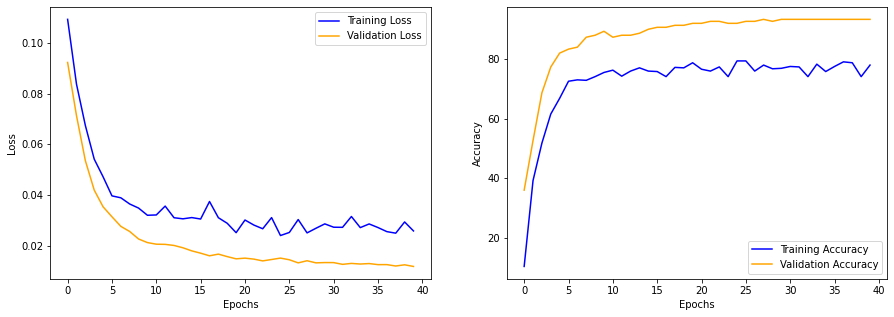

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

ax[0].plot(train_loss,label='Training Loss',Color='blue')
ax[0].plot(val_loss,label='Validation Loss',Color='orange')
ax[0].set(xlabel='Epochs', ylabel='Loss')
ax[0].legend()

ax[1].plot(train_accuracy,label='Training Accuracy',Color='blue')
ax[1].plot(val_accuracy,label='Validation Accuracy',Color='orange')
ax[1].set(xlabel='Epochs', ylabel='Accuracy')
ax[1].legend()

In [ ]:
total = 0.0
correct = 0.0

with torch.no_grad():
  for data in testloader:
    images, labels = data 
    outputs = model(images)

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Test Accuracy = %.3f' %(100*correct/total))     

Test Accuracy = 93.373
